In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Load Data

In [2]:
bank_info = pd.read_csv('bank-additional-full.csv', delimiter=";") # whole data set
dataset = bank_info.drop(bank_info.columns[7:15], axis=1) # data set excluding campaign information

In [3]:
pd.set_option('display.max_columns', None)
bank_info

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Question I
## What are the relationships between the clients' information and whether the clients have specific loan or not?

In [4]:
dataset.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [23]:
dataset.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [24]:
#calculating the percentage of people having a specific loan (unknown values ignored)
print('The percentage of people having a personal loan in the data is %f%%' % (6248/(6248+33950)*100))
print('The percentage of people having a housing loan in the data is %f%%' % (21576/(21576+18622)*100))

The percentage of people having a personal loan in the data is 15.543062%
The percentage of people having a housing loan in the data is 53.674312%


In [37]:
df_loan = dataset[dataset.loan != 'unknown'].reset_index(drop=True) #drop unknown values in loan
df_housing = dataset[dataset.housing != 'unknown'].reset_index(drop=True) #drop unknown values in housing
df_loan = df_loan.drop('housing', axis=1)
df_housing = df_housing.drop('loan', axis=1)#.housing.replace(['yes','no'], [1, 0])
df_loan.head()

,age,job,marital,education,default,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,no,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,1.1,93.994,-36.4,4.857,5191.0,no


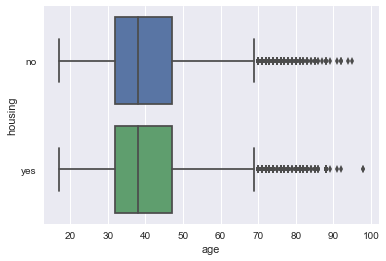

In [26]:
#boxplot on age vs housing
sns.boxplot(df_housing['age'],df_housing['housing'])
sns.despine()

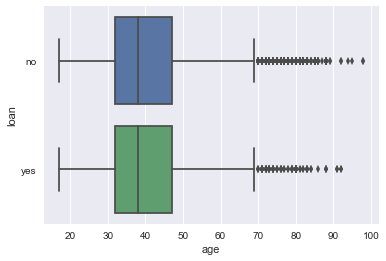

In [29]:
#boxplot on age vs loan
sns.boxplot(df_loan['age'],df_loan['loan'])
sns.despine()

In [31]:
#explore the effect of marital status on having a housing loan or not
h_m = df_housing.groupby(['marital', 'housing']).size().unstack()
h_m['percentage'] = h_m.yes / (h_m.no + h_m.yes)
h_m.sort_values('percentage')#.drop(h_m.columns[0:3], axis = 1).plot(kind='bar')

housing,no,yes,percentage
marital,,,
unknown,44,35,0.443038
married,11389,12951,0.532087
divorced,2092,2399,0.534179
single,5097,6191,0.548459


loan,no,yes,percentage
education,,,
unknown,1449,242,0.143111
basic.6y,1902,330,0.147849
basic.9y,5011,883,0.149813
basic.4y,3435,624,0.153732
professional.course,4325,793,0.154943
high.school,7852,1443,0.155245
university.degree,9961,1930,0.162308
illiterate,15,3,0.166667


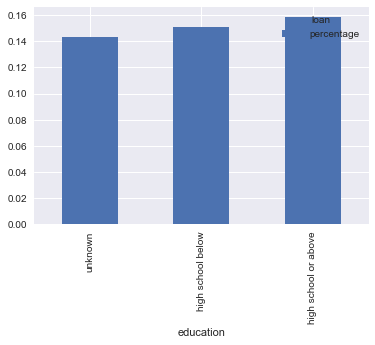

In [73]:
#explore the effect of education level on having a personal loan or not
l_e = df_loan.groupby(['education', 'loan']).size().unstack(0)
l_e['high school or above'] = l_e['high.school'] + l_e['university.degree'] + l_e['professional.course']
l_e['high school below'] = l_e['basic.4y'] + l_e['basic.6y'] + l_e['basic.9y'] + l_e['illiterate']
l_e = l_e.unstack().unstack()
l_e['percentage'] = l_e.yes / (l_e.no + l_e.yes)
l_e1 = l_e.drop(l_e.index[0:7])
l_e2 = l_e.drop(l_e.index[8:10])
l_e1.sort_values('percentage').drop(l_e1.columns[0:2], axis = 1).plot(kind='bar')
l_e2.sort_values('percentage')

housing,no,yes,percentage
education,,,
unknown,816,875,0.517445
basic.4y,1955,2104,0.518354
basic.6y,1070,1162,0.520609
high.school,4363,4932,0.530608
basic.9y,2743,3151,0.534611
university.degree,5387,6504,0.546968
professional.course,2280,2838,0.554513
illiterate,8,10,0.555556


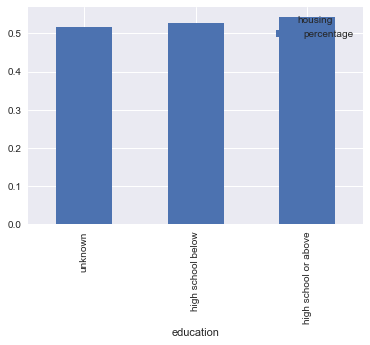

In [74]:
h_e = df_housing.groupby(['education', 'housing']).size().unstack(0)
h_e['high school or above'] = h_e['high.school'] + h_e['university.degree'] + h_e['professional.course']
h_e['high school below'] = h_e['basic.4y'] + h_e['basic.6y'] + h_e['basic.9y'] + h_e['illiterate']
h_e = h_e.unstack().unstack()
h_e['percentage'] = h_e.yes / (h_e.no + h_e.yes)
h_e1 = h_e.drop(h_e.index[0:7])
h_e2 = h_e.drop(h_e.index[8:10])
h_e1.sort_values('percentage').drop(h_e1.columns[0:2], axis = 1).plot(kind='bar')
h_e2.sort_values('percentage')

In [35]:
h_j = df_housing.groupby(['job', 'housing']).size().unstack().fillna(0)
h_j['percentage'] = h_j.yes / (h_j.no + h_j.yes)
h_j.sort_values('percentage')#.drop(h_j.columns[0:3], axis = 1).plot(kind='bar')

housing,no,yes,percentage
job,,,
management,1363,1490,0.522257
blue-collar,4304,4710,0.522521
housemaid,491,540,0.523763
unknown,153,172,0.529231
services,1818,2050,0.529990
retired,784,892,0.532220
self-employed,641,740,0.535844
admin.,4636,5559,0.545267
technician,2980,3616,0.548211


In [36]:
l_j = df_loan.groupby(['job', 'loan']).size().unstack().fillna(0)
l_j['percentage'] = l_j.yes / (l_j.no + l_j.yes)
l_j.sort_values('percentage')#.drop(h_j.columns[0:3], axis = 1).plot(kind='bar')

loan,no,yes,percentage
job,,,
self-employed,1186,195,0.141202
retired,1436,240,0.143198
entrepreneur,1214,206,0.145070
housemaid,877,154,0.149370
technician,5607,989,0.149939
unemployed,838,149,0.150963
blue-collar,7648,1366,0.151542
management,2414,439,0.153873
services,3267,601,0.155377


## Conclusion I
From the trends and visualizations that found through the exploration, most of the clients' information do not have a large effect on whether the clients have specific loan or not (housing loan and personal loan have the same results). Thus, moving to the next question as following for the first capstone project is neccessary.

## Question II
## Do clients' information and campaign methods affect whether the phone call campaign would be successful?

In [6]:
bank_info.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

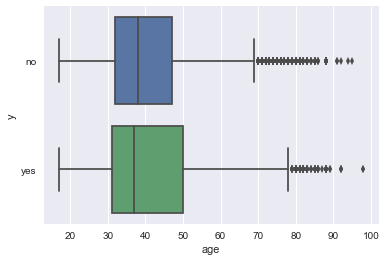

In [7]:
#age effect on campaign success rate
sns.boxplot(bank_info['age'],bank_info['y'])
sns.despine()

y,no,yes,percentage
education,,,
basic.9y,5572,473,0.078246
basic.6y,2104,188,0.082024
basic.4y,3748,428,0.102490
high.school,8484,1031,0.108355
professional.course,4648,595,0.113485
university.degree,10498,1670,0.137245
unknown,1480,251,0.145003
illiterate,14,4,0.222222


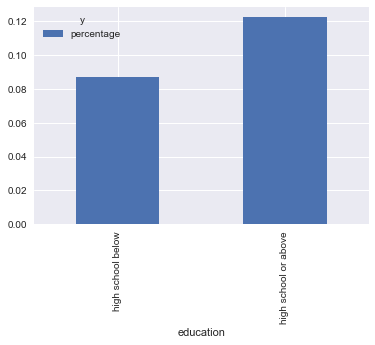

In [25]:
#education level effect on campaign success rate
edu = bank_info.groupby(['education', 'y']).size().unstack(0)
edu['high school or above'] = edu['high.school'] + edu['university.degree'] + edu['professional.course']
edu['high school below'] = edu['basic.4y'] + edu['basic.6y'] + edu['basic.9y'] + edu['illiterate']
edu = edu.unstack().unstack()
edu['percentage'] = edu.yes / (edu.no + edu.yes)
edu1 = edu.drop(edu.index[0:8])
edu2 = edu.drop(edu.index[8:10])
edu1.sort_values('percentage').drop(edu1.columns[0:2], axis = 1).plot(kind='bar')
edu2.sort_values('percentage')

In [29]:
#job type effect on campaign success rate
job = bank_info.groupby(['job', 'y']).size().unstack()
job['percentage'] = job.yes / (job.no + job.yes)
job.sort_values('percentage')
#student, unemployed, housemaid: how to deal with these three categories that have small population?
#group suggestion: blue-collar+serviced+housemaid+technician, entrepreneur+self-employed+management+admin

y,no,yes,percentage
job,,,
blue-collar,8616,638,0.068943
services,3646,323,0.081381
entrepreneur,1332,124,0.085165
housemaid,954,106,0.100000
self-employed,1272,149,0.104856
technician,6013,730,0.108260
unknown,293,37,0.112121
management,2596,328,0.112175
admin.,9070,1352,0.129726


In [4]:
#marital situation on campaign success rate
mar = bank_info.groupby(['marital', 'y']).size().unstack(0)
mar['married_current_or_before'] = mar.divorced + mar.married
#single combined with unknown as the amount of unknown values is small and close to single success rate
mar['not_married'] = mar.single + mar.unknown 
mar = mar.unstack().unstack()
mar['percentage'] = mar.yes / (mar.no + mar.yes)
mar1 = mar.drop(mar.index[0:4])
mar1

y,no,yes,percentage
marital,,,
married_current_or_before,26532,3008,0.101828
not_married,10016,1632,0.140110


In [161]:
#call times effect on campaign success rate
cam = bank_info.groupby(['campaign', 'y']).size().unstack(0).fillna(0)
cam['6-56'] = cam.loc[:,6:56].sum(1)
#cam.loc[:,1:10].sum(1)
cam['1-5'] = cam[1] + cam[2] + cam[3] + cam[4] + cam[5]
cam = cam.unstack().unstack()
cam = cam.drop(cam.index[0:42])
cam['percentage'] = cam.yes / (cam.no + cam.yes)
cam.sort_values('percentage')

y,no,yes,percentage
campaign,,,
6-56,3199.0,186.0,0.054948
1-5,33349.0,4454.0,0.117821


y,no,yes,percentage
month,,,
first_half,26530,2909,0.098814
second_half,10018,1731,0.147332


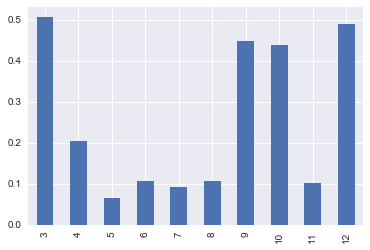

In [52]:
#contact month effect on campaign success rate
mon = bank_info.groupby(['month', 'y']).size().unstack(0)
mon['first_half'] = mon.mar + mon.apr + mon.may + mon.jun + mon.jul
mon['second_half'] = mon.aug + mon.sep + mon.oct + mon.nov + mon.dec
mon = mon.unstack().unstack()
mon['percentage'] = mon.yes/(mon.yes + mon.no)
mon1 = mon.drop(mon.index[0:10])
mon2 = mon.drop(mon.index[10:12])
mon2 = mon2.set_index([[4,8,12,7,6,3,5,11,10,9]])
mon2.sort_index().percentage.plot(kind='bar')
mon1.sort_values('percentage')

In [50]:
con = bank_info.groupby(['contact', 'y']).size().unstack()
con['percentage'] = con.yes / (con.yes + con.no)
con

y,no,yes,percentage
contact,,,
cellular,22291,3853,0.147376
telephone,14257,787,0.052313


In [87]:
#phone call duration effect on campaign success rate
dur = bank_info.groupby(['duration', 'y']).size().unstack(0).fillna(0)
df = pd.DataFrame()
a = dur.loc[:,0:500].sum(1)
b = dur.loc[:,501:5000].sum(1)
df = df.append([a,b], ignore_index=True)
df['percentage'] = df.yes / (df.yes + df.no)
df

y,no,yes,percentage
0,33718.0,2542.0,0.070105
1,2830.0,2098.0,0.425731


In [8]:
#phone call day of week effect on campaign success rate
day = bank_info.groupby(['day_of_week', 'y']).size().unstack()
day['percentage'] = day.yes/(day.yes + day.no)
day.sort_values('percentage')

y,no,yes,percentage
day_of_week,,,
mon,7667,847,0.099483
fri,6981,846,0.108087
wed,7185,949,0.116671
tue,7137,953,0.117800
thu,7578,1045,0.121188


In [34]:
#number of days that passed by after the client was last contacted from a previous campaign
pday = bank_info.groupby(['pdays', 'y']).size().unstack(0).fillna(0)
pday['0-27'] = pday.loc[:,0:27].sum(1)
pday = pday.unstack().unstack()
pday1 = pday.drop(pday.index[0:26])
pday1['percentage'] = pday1.yes / (pday1.yes + pday1.no)
pday1.sort_values('percentage')

y,no,yes,percentage
pdays,,,
999,36000.0,3673.0,0.092582
0-27,548.0,967.0,0.638284


In [39]:
#outcome of the previous marketing campaign effect on campaign success
pout = bank_info.groupby(['poutcome', 'y']).size().unstack()
pout['percentage'] = pout.yes / (pout.yes + pout.no)
pout.sort_values('percentage')

y,no,yes,percentage
poutcome,,,
nonexistent,32422,3141,0.088322
failure,3647,605,0.142286
success,479,894,0.651129


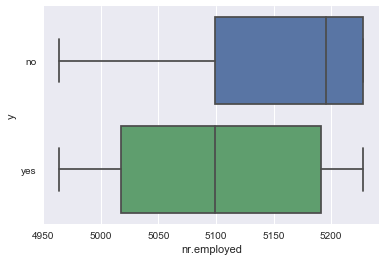

In [8]:
#number of employees quarterly indicater (numeric) effect on campaign success rate
sns.boxplot(bank_info['nr.employed'],bank_info['y'])
sns.despine()

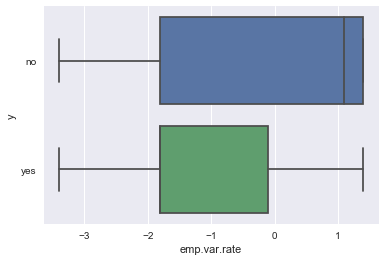

In [4]:
#employment variation rate - quarterly indicator (numeric) effect on campaign success rate
sns.boxplot(bank_info['emp.var.rate'],bank_info['y'])
sns.despine()

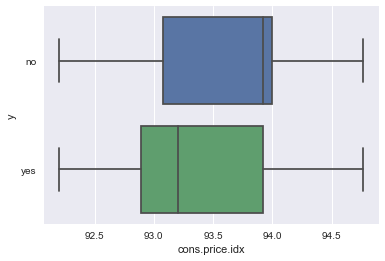

In [5]:
#consumer price index - monthly indicator (numeric) effect on campaign success rate
sns.boxplot(bank_info['cons.price.idx'],bank_info['y'])
sns.despine()

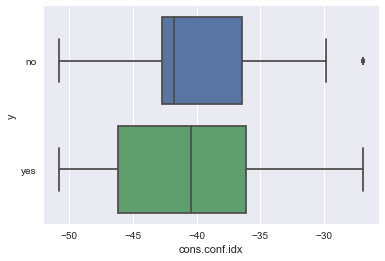

In [6]:
#consumer confidence index - monthly indicator (numeric) effect on campaign success rate
sns.boxplot(bank_info['cons.conf.idx'],bank_info['y'])
sns.despine()

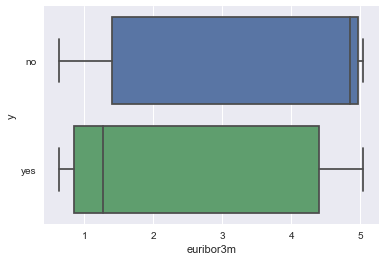

In [7]:
sns.boxplot(bank_info['euribor3m'],bank_info['y'])
sns.despine()

In [9]:
#has credit in default? (categorical: 'no','yes','unknown')
default = bank_info.groupby(['default', 'y']).size().unstack().fillna(0)
default['percentage'] = default.yes / (default.yes + default.no)
default

y,no,yes,percentage
default,,,
no,28391.0,4197.0,0.12879
unknown,8154.0,443.0,0.05153
yes,3.0,0.0,0.00000


### Inputs that showing almost no effect on campaign success rate

In [42]:
#housing loan effect on campaign success
hou = bank_info.groupby(['housing', 'y']).size().unstack()
hou['percentage'] = hou.yes / (hou.yes + hou.no)
hou #not much relationship between housing loan and campaign success

y,no,yes,percentage
housing,,,
no,16596,2026,0.108796
unknown,883,107,0.108081
yes,19069,2507,0.116194


In [43]:
#personal loan effect on campaign success
per = bank_info.groupby(['loan', 'y']).size().unstack()
per['percentage'] = per.yes / (per.yes + per.no)
per #not much relationship between personal loan and campaign success

y,no,yes,percentage
loan,,,
no,30100,3850,0.113402
unknown,883,107,0.108081
yes,5565,683,0.109315


## Conclusion II
From the investigated trends and visualization above, many of the clients' information and campaign methods are highly related to whether the campaign would success or not. Hence, predicting the results of the phone call campaign based on clients' information and campaign methods is a reasonable project to do. 